In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
# import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [60]:
np.random.seed(0)
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state = 123, noise=0.1, factor=0.2)
# print(X) 
# print(y)

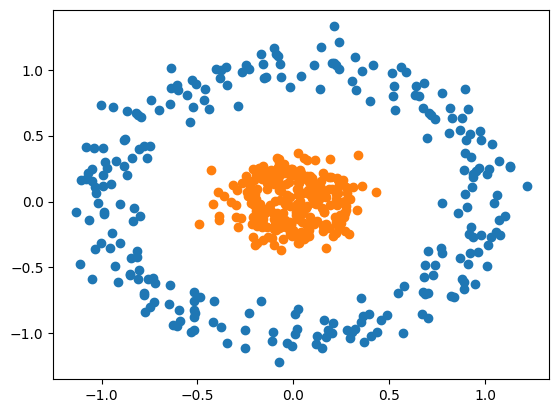

In [61]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [62]:

model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))#Hidden Layer connected to precedng layer in the above line of code
model.compile(Adam(learning_rate = 0.01), 'binary_crossentropy', metrics=['accuracy'])

In [63]:
h = model.fit(x=X, y=y, verbose=1, batch_size=20, epochs=100, shuffle='true')

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5015 - loss: 0.6945   
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6086 - loss: 0.7004 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3886 - loss: 0.6934 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5435 - loss: 0.6929 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5456 - loss: 0.6905 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3443 - loss: 0.6961 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5967 - loss: 0.6951 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6866 - loss: 0.6920 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4682 - loss: 0.6938 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4004 - loss: 0.6918 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5498 - loss: 0.6879 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

Text(0.5, 1.0, 'accuracy')

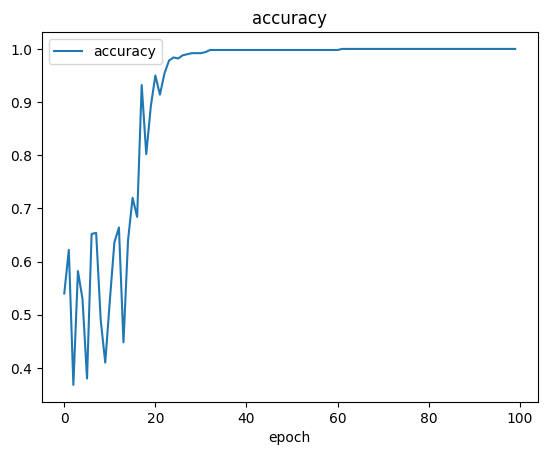

In [64]:
plt.plot(h.history['accuracy'])
plt.legend(['accuracy'])
# plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('accuracy')

Text(0.5, 0, 'epoch')

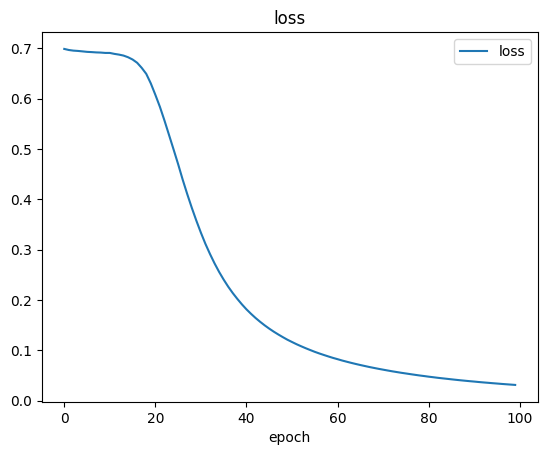

In [65]:
plt.plot(h.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')

In [66]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25, 50)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


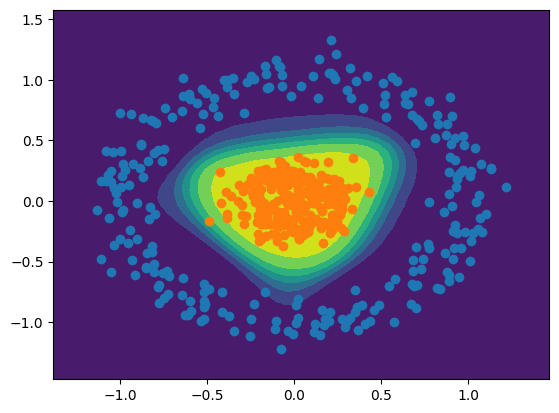

In [67]:
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prediction is:  [[0.12051892]]


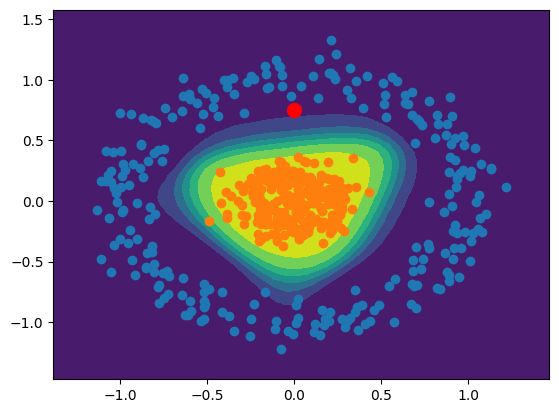

In [68]:
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
x = 0
y = 0.75
 
point = np.array([[x, y]])
predict = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is: ", predict)